In [ ]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None


#  STAT3250 Final Project: Sentiment and Approval Analysis of Joe Biden and Donald Trump

# **1. Importing the Datasets:**
1. Joe Biden Tweets
2. Donald Trump Tweets
3. Joe Biden Approval Ratings
4. Donald Trump Approval Ratings



In [ ]:
JB_tweets = pd.read_excel("/Users/sarachan/Downloads/Project/JoeBiden.xlsx")

In [ ]:
DT_tweets = pd.read_excel("/Users/sarachan/Downloads/Project/DonTrump.xlsx")

In [ ]:
Trump_AR = pd.read_excel("/Users/sarachan/Downloads/Project/Trump_AR.xlsx")

In [ ]:
Biden_AR = pd.read_excel("/Users/sarachan/Downloads/Project/Biden_AR.xlsx")

# **2. General Data Cleaning:**

First, we subset the Joe Biden and Donald Trump tweets with the significant columns and format the time for clearer analysis, this includes converting a time column to the datetime format (referred to as date for the rest of this summary), and we pull off the Year and Month from this modified variable.  For both subsets, we add a column named ID which will store the twitter handle of the associated tweet (either from Trump or Biden) (Dataframes: subset_DT and subset_JB)



In [ ]:
# Subset Joe Biden tweets
subset_JB = JB_tweets[["created_at", "content"]]

# Convert 'created_at' to datetime format and extract year and month
subset_JB['created_at'] = pd.to_datetime(subset_JB['created_at'], errors='coerce')
subset_JB['Year'] = subset_JB['created_at'].dt.year
subset_JB['Month'] = subset_JB['created_at'].dt.month

# Format 'created_at' to "day month year" format
subset_JB['created_at'] = subset_JB['created_at'].dt.strftime('%d %b %Y')

# Add the 'ID' column with '@JoeBiden'
subset_JB['ID'] = '@JoeBiden'

# Reorder the columns
subset_JB = subset_JB[['ID', 'created_at', 'Year', 'Month', 'content']]

In [ ]:
subset_JB

,ID,created_at,Year,Month,content
0,@JoeBiden,17 Dec 2022,2022,12,Representatives of the people took a vote on t...
1,@JoeBiden,17 Dec 2022,2022,12,"Thanks to the Inflation Reduction Act, out-of-..."
2,@JoeBiden,17 Dec 2022,2022,12,When hospitals and community centers are threa...
3,@JoeBiden,16 Dec 2022,2022,12,The American people won.\nBig Pharma lost.\n\n...
4,@JoeBiden,16 Dec 2022,2022,12,We are making the largest investment ever in c...
...,...,...,...,...,...
7476,@JoeBiden,09 Apr 2012,2012,4,News for you this morning: VP Biden will speak...
7477,@JoeBiden,09 Apr 2012,2012,4,Campaign staff will run this account to keep y...
7478,@JoeBiden,09 Apr 2012,2012,4,We're excited to announce that @JoeBiden is be...
7479,@JoeBiden,29 Dec 2007,2007,12,"Iowans, there's a good chance there's a Biden ..."


In [ ]:
# Subset Donald Trump tweets
subset_DT = DT_tweets[["ID", "Time", "Tweet Text"]]

# Convert 'Time' to datetime format and extract year and month
subset_DT['Time'] = pd.to_datetime(subset_DT['Time'], errors='coerce')
subset_DT['Year'] = subset_DT['Time'].dt.year
subset_DT['Month'] = subset_DT['Time'].dt.month

# Format 'Time' to "day month year" format
subset_DT['Time'] = subset_DT['Time'].dt.strftime('%d %b %Y')

# Create an ID column in subset_DT for consistency
subset_DT['ID'] = "@DonaldTrump"

# Reorder the columns
subset_DT = subset_DT[['ID', 'Time', 'Year', 'Month', 'Tweet Text']]

In [ ]:
subset_DT

,ID,Time,Year,Month,Tweet Text
0,@DonaldTrump,20 Jan 2017,2017,1,It all begins today! I will see you at 11:00 A...
1,@DonaldTrump,20 Jan 2017,2017,1,Today we are not merely transferring power fro...
2,@DonaldTrump,20 Jan 2017,2017,1,"power from Washington, D.C. and giving it back..."
3,@DonaldTrump,20 Jan 2017,2017,1,What truly matters is not which party controls...
4,@DonaldTrump,20 Jan 2017,2017,1,"January 20th 2017, will be remembered as the d..."
...,...,...,...,...,...
23070,@DonaldTrump,07 Jan 2021,2021,1,I am asking for everyone at the U.S. Capitol t...
23071,@DonaldTrump,07 Jan 2021,2021,1,https://t.co/Pm2PKV0Fp3
23072,@DonaldTrump,08 Jan 2021,2021,1,https://t.co/csX07ZVWGe
23073,@DonaldTrump,08 Jan 2021,2021,1,"The 75,000,000 great American Patriots who vot..."


We merge these subsets to a combined tweets dataset called df1, which contains the variables ID, Year, Month, and Tweet Content.  We make the choice to remove tweets that start with a url or are retweets (starts with ‘RT’) in order to avoid repeat information or tweet content that cannot be reasonably processed through our sentiment analysis.  Our full date variable is changed to ‘Time’, and we order the tweets from latest to earliest.


In [ ]:
#Standardize the column names for both datasets so merging is easier
subset_JB = subset_JB.rename(columns={"created_at": "Time", "content": "Tweet Content"})
subset_DT = subset_DT.rename(columns={ "Tweet Text": "Tweet Content"})

#concatenate the two datasets
combined_data = pd.concat([subset_JB, subset_DT], ignore_index=True)

#Sort by 'Date' in descending order - ideally, the dates should be from latest to earliest
sorted_data = combined_data.sort_values(by='Time', ascending=False)

#Reset the index for clean output - more of a personal preference thing, you can ignore this lololol
sorted_data = sorted_data.reset_index(drop=True)

df1 = sorted_data
df1 = df1[~df1['Tweet Content'].str.startswith(('RT', 'http'))]

In [ ]:
df1

,ID,Time,Year,Month,Tweet Content
0,@JoeBiden,31 Oct 2022,2022,10,If we elect more Senate Democrats and keep con...
1,@JoeBiden,31 Oct 2022,2022,10,Make your plan to vote early or on Election Da...
2,@JoeBiden,31 Oct 2022,2022,10,"With Election Day right around the corner, I’m..."
3,@JoeBiden,31 Oct 2022,2022,10,I know which side I’m on.\nhttps://t.co/RBiVHJ...
4,@JoeBiden,31 Oct 2021,2021,10,"Virginia and New Jersey, there are only a few ..."
...,...,...,...,...,...
30550,@DonaldTrump,01 Apr 2017,2017,4,We are going to defend our industry &amp; crea...
30551,@DonaldTrump,01 Apr 2017,2017,4,Trump Celebrates American Manufacturing Survey...
30552,@DonaldTrump,01 Apr 2017,2017,4,It is an exciting time for our country! #Weekl...
30553,@DonaldTrump,01 Apr 2017,2017,4,#ConfirmGorsuch #SCOTUS https://t.co/WkqHYMcYa3


We also have a separate data frame for approval ratings, merged_AR, which contains the date, the associated approval rating, the user (or ID), as well as Year and Month.  The latter two variables come as a result of subsetting the date objects in our Date variable.  This dataset becomes sorted based on the date later on when we plot it.


In [ ]:
# For Biden data
Biden_AR['User'] = '@JoeBiden'
Biden_AR['Year'] = Biden_AR['Date'].dt.year
Biden_AR['Month'] = Biden_AR['Date'].dt.month

# For Trump data
Trump_AR['User'] = '@DonaldTrump'
Trump_AR['Year'] = Trump_AR['Date'].dt.year
Trump_AR['Month'] = Trump_AR['Date'].dt.month

# merge the dataset

merged_AR = pd.concat([Biden_AR, Trump_AR], ignore_index=True)

In [ ]:
merged_AR

,Date,Approval Rating,User,Year,Month
0,2021-01-26,51.7,@JoeBiden,2021,1
1,2021-02-22,50.9,@JoeBiden,2021,2
2,2021-03-16,54.8,@JoeBiden,2021,3
3,2021-04-20,50.9,@JoeBiden,2021,4
4,2021-05-18,52.1,@JoeBiden,2021,5
...,...,...,...,...,...
87,2020-09-28,46.0,@DonaldTrump,2020,9
88,2020-10-27,46.0,@DonaldTrump,2020,10
89,2020-11-19,43.0,@DonaldTrump,2020,11
90,2020-12-17,39.0,@DonaldTrump,2020,12


# **3. Preparing the Data**
*   Text reformating, preprocessing, and stemming forms the core of text analysis and Natural Language Processing (NLP)
*   The general idea behind these techniques is to break apart and standardize the textual data such that we only hold the most important information about each word, each word is unique, and we can relate the words together. This process is often referred to as **tokenization** and the resulting fragemented and cleaned words are known as **tokens**.


We do the following:
1.   Text Reformating
    * Removing all the whitespace



2.   Text Cleaning
    * Preprocessing:
      * Converting to lower-case
      * Removing punctuation
      * Removing numbers
      * Removing stopwords
    * Stemming

3. Creating a document-term matrix (dtm).


### **Porter Stemming Algorithm**
The Porter Stemming Algorithm is built into the NLTK package and is a unique way of breaking apart words. The algorithm attempts to reduce words to just their roots:


1. **Consonant-Vowel Representation**
Words are classified into consonant (C) and vowel (V) groups


2. **Stemming Rule Structure**
The algorithm uses rules in the form:
$ (condition) S_1 \rightarrow S_2 $
Where:
  - $S_1$ is the original suffix
  - $S_2$ is the replacement suffix
  - Condition determines suffix removal


3. **Measure Concept $m$**
The measure $m$ represents consonant-vowel group repetitions:
  - $m = 0$: Short words (e.g., "tree")
  - $m = 1$: Moderate length (e.g., "trees")
  - $m = 2$: Longer words (e.g., "private")


- *Limitations of Stemming:*
  - Can sometimes over-stem or under-stem words
  - May create non-existent word roots

# **3. Packages**






### **Packages for Text Reformating (1) and Text Cleaning (2)**

####  - NLTK (Natural Language Toolkit)
NLTK is a popular Python package for natural language processing (NLP) and is the main package used for text preprocessing. It does the following:
- Tokenization
- Stop word removal
- Stemming
- Text preprocessing techniques

#### - Regular Expressions (re)
We use the re library to perform regex operations that clean the text data.




### **Packages for creating the document term matrix (3)**

#### - Scikit-learn
Scikit-learn is a machine-learning library that we’ll use to vectorize our tokens to create the DTM.



In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectPercentile, chi2
import re
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

In [ ]:
def preprocess_text(df, text_column):
    stemmer = PorterStemmer()
    stop_words = set(stopwords.words('english'))

    # Preprocessing pipeline
    def clean_text(text):
        # Convert to string if not already
        text = str(text)
        # Convert to lowercase
        text = text.lower()
        # Remove links using regex
        text = re.sub(r'https?://\S+', '', text)
        # Remove punctuation
        text = ''.join(char for char in text if char.isalnum() or char.isspace())
        # Remove numbers
        text = ''.join(char for char in text if not char.isdigit())
        # Tokenize
        tokens = text.split()
        # Remove stopwords and stem
        tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]
        # Remove links

        # If all tokens are removed, return the original text
        return ' '.join(tokens) if tokens else text

    # Apply preprocessing to the text column
    df['preprocessed_text'] = df[text_column].apply(clean_text)

    # Filter out completely empty preprocessed texts
    df = df[df['preprocessed_text'].str.strip() != '']

    # Create Document-Term Matrix
    vectorizer = CountVectorizer(min_df=1)  # Ensure at least one document uses each term
    dtm = vectorizer.fit_transform(df['preprocessed_text'])

    return df, dtm, vectorizer

# **4. Sparsity**
Once we’ve created our DTM, we need to set the sparsity of our terms. Think of this as removing NAs. We need to remove the terms that have the most zero values.



In [ ]:

def remove_sparse_terms(dtm, max_sparsity=0.90):
    # Convert sparse matrix to array for feature selection
    X = dtm.toarray()
    # Create a dummy y variable (required for chi2)
    y = np.ones(X.shape[0])

    # Calculate the percentile to keep based on sparsity
    percentile = (1 - max_sparsity) * 100

    # Use SelectPercentile to remove sparse terms
    selector = SelectPercentile(chi2, percentile=percentile)
    dtm_reduced = selector.fit_transform(X, y)

    return dtm_reduced, selector

# Application to the dataset
df, dtm, vectorizer = preprocess_text(df1, df1.columns[4])

# Remove sparse terms
dtm_candidates, selector = remove_sparse_terms(dtm, max_sparsity=0.90)

# Get feature names for the reduced matrix
terms_candidates = vectorizer.get_feature_names_out()[selector.get_support()]

# Convert reduced DTM to a DataFrame
candidate_tweets = pd.DataFrame(dtm_candidates, columns=terms_candidates)


In [ ]:
candidate_tweets

,aa,aaa,aand,aanhpi,aap,aapi,aaron,aarp,aarpiowaforum,ab,...,bradyfortexa,brag,bragg,brain,brainer,braithwait,branch,brand,brandish,brandnew
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21810,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21811,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21812,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21813,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print("Number of terms removed:", len(terms_candidates))

Number of terms removed: 1526


# **5.Data Visualization**
First, we perform exploratory data analysis. We start by visualizing the relationships between the words, seeing which words come up the most and looking at some summary statistics.



In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from scipy import stats
df1
df2=df1

In [ ]:

# Sentiment Analysis
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

# Apply sentiment analysis to original tweets
df1['sentiment'] = df1['Tweet Content'].apply(get_sentiment)

# Create time-based groups using the Date column
df1['Date'] = pd.to_datetime(df1['Time'])
df1['Month'] = df1['Date'].dt.to_period('M')

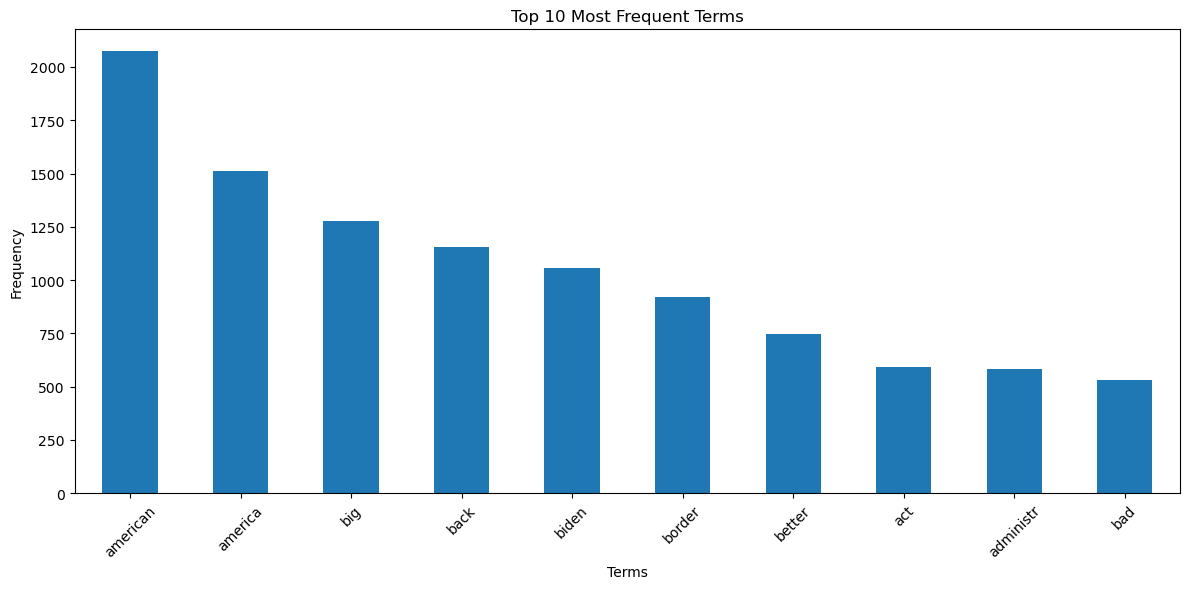

In [ ]:

# Visualization of Term Frequencies
term_frequencies = candidate_tweets.sum().sort_values(ascending=False)
# Filter out 'amp'
term_frequencies = term_frequencies[term_frequencies.index != 'amp']
top_10_terms = term_frequencies.head(10)

plt.figure(figsize=(12, 6))
top_10_terms.plot(kind='bar')
plt.title('Top 10 Most Frequent Terms')
plt.xlabel('Terms')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


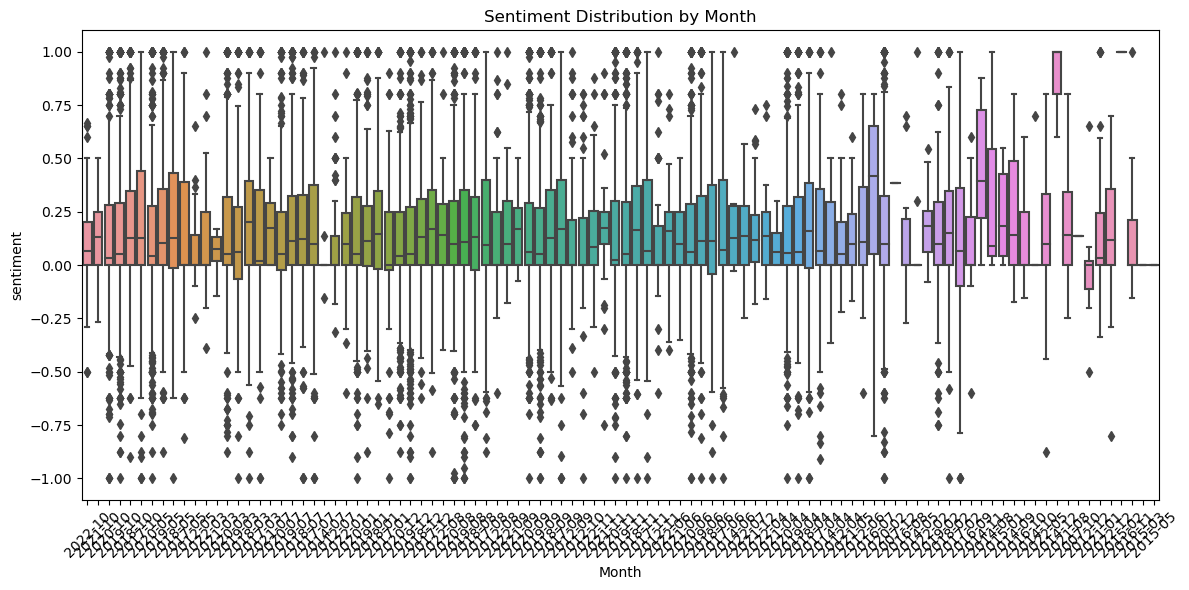

In [ ]:

# Sentiment Distribution Over Time
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='sentiment', data=df1)
plt.title("Sentiment Distribution by Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


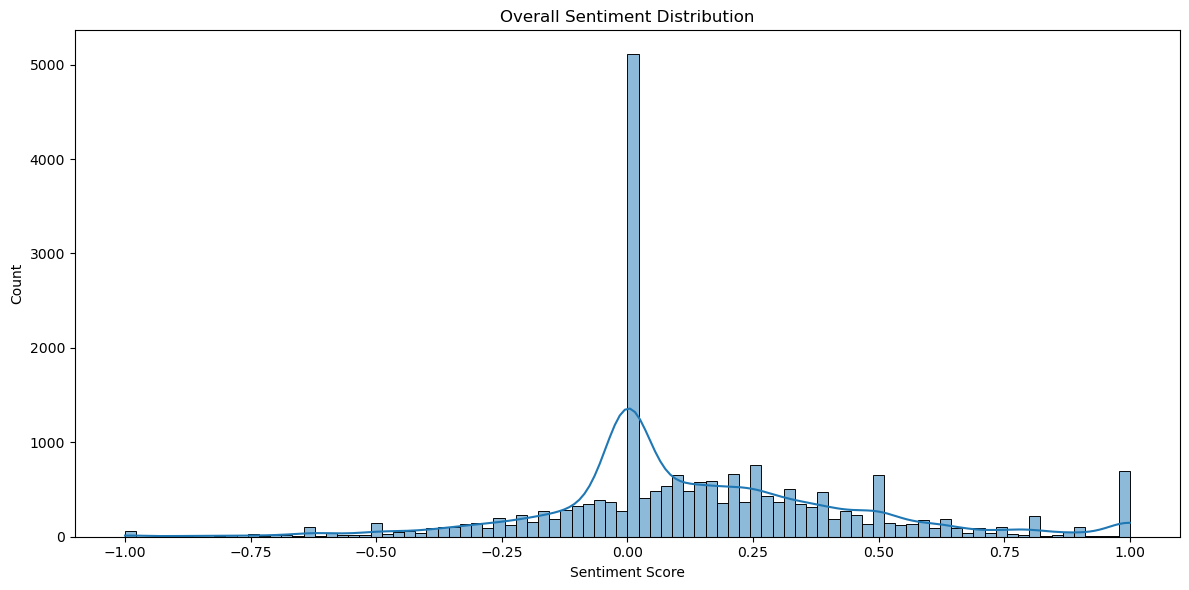

In [ ]:

# Overall Sentiment Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df1, x='sentiment', kde=True)
plt.title("Overall Sentiment Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [ ]:

# Basic statistics for sentiment
print("\nSentiment Statistics:")
print(df1['sentiment'].describe())



Sentiment Statistics:
count    21822.000000
mean         0.146439
std          0.317537
min         -1.000000
25%          0.000000
50%          0.081250
75%          0.312500
max          1.000000
Name: sentiment, dtype: float64


In [ ]:

# Monthly sentiment statistics
monthly_stats = df1.groupby('Month')['sentiment'].agg(['mean', 'std', 'count'])
print("\nMonthly Sentiment Statistics:")
print(monthly_stats)



Monthly Sentiment Statistics:
             mean       std  count
Month                             
2007-10  0.136364       NaN      1
2007-12  0.383333       NaN      1
2012-04  0.129114  0.205912     65
2012-05  0.086835  0.153165     51
2012-06  0.185272  0.268351     60
...           ...       ...    ...
2022-08  0.153042  0.224050     79
2022-09  0.157094  0.208701     81
2022-10  0.117654  0.216518    111
2022-11  0.150709  0.218095     96
2022-12  0.164797  0.309574     28

[100 rows x 3 columns]


In [ ]:

# Statistical comparison between months
months = df1['Month'].unique()
comparisons = []
for i in range(len(months)):
    for j in range(i+1, len(months)):
        month1 = months[i]
        month2 = months[j]
        stat, p = stats.mannwhitneyu(
            df1[df1['Month'] == month1]['sentiment'],
            df1[df1['Month'] == month2]['sentiment']
        )
        comparisons.append({
            'Month1': month1,
            'Month2': month2,
            'p_value': p
        })

comparisons_df = pd.DataFrame(comparisons)
print("\nPairwise Comparisons between Months:")
print(comparisons_df)



Pairwise Comparisons between Months:
       Month1   Month2   p_value
0     2022-10  2021-10  0.104565
1     2022-10  2020-10  0.725788
2     2022-10  2019-10  0.595317
3     2022-10  2018-10  0.160420
4     2022-10  2017-10  0.170932
...       ...      ...       ...
4945  2015-02  2015-03  1.000000
4946  2015-02  2015-05  1.000000
4947  2016-11  2015-03  0.670755
4948  2016-11  2015-05  0.670755
4949  2015-03  2015-05  1.000000

[4950 rows x 3 columns]


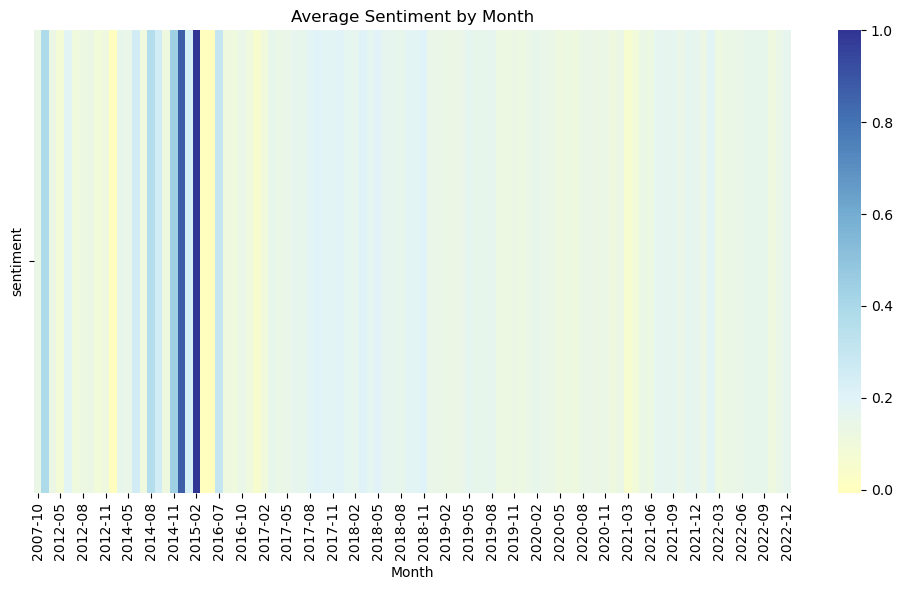

In [ ]:

# Create a heatmap of average sentiment by month
plt.figure(figsize=(10, 6))
monthly_sentiment = df1.pivot_table(
    values='sentiment',
    index='Month',
    aggfunc='mean'
).T
sns.heatmap(monthly_sentiment, cmap='RdYlBu', center=0)
plt.title('Average Sentiment by Month')
plt.tight_layout()
plt.show()


We were unable to draw conclusions due to the inconclusive EDA, so we looked into our dataset to see how the text was being pre-processed and how the sentiment was being calculated. We learned TextBlob offers only polarity and subjectivity scores, which are less comprehensive.



In [ ]:

sentiment = df1[['preprocessed_text', 'sentiment']]
sentiment[1:50]


,preprocessed_text,sentiment
1,make plan vote earli elect day,0.100000
2,elect day right around corner im head florida ...,0.065079
3,know side im,0.000000
4,virginia new jersey day left get vote help ele...,0.065115
5,invest build back better framework stop americ...,0.166667
6,suburban women trend strongli campaign want sa...,0.160565
7,biden win would mean end frack pennsylvania te...,0.162500
8,make america great,1.000000
11,presid obama meant lot black peopl didnt thing...,-0.166667
12,one way defend digniti one way defend famili c...,0.000000


We decided to use another sentiment analysis analyzer: Vader

VADER (Valence Aware Dictionary and sEntiment Reasoner) is often more effective than TextBlob for social media sentiment analysis. Designed to handle the nuances of short and casual language, VADER interprets emojis, slang, acronyms, intensifiers (e.g., “extremely good”), and negations (e.g., “not bad”) with high accuracy. It provides granular sentiment scores, including positive, neutral, negative, and a compound polarity score ranging from -1 (most negative) to +1 (most positive), allowing for more detailed sentiment insights.


We redo our exploratory data analysis and the summary statistics.


In [ ]:
# Import the Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER Sentiment Analyzer
sid = SentimentIntensityAnalyzer()

# Sentiment Analysis Function
def get_vader_sentiment(text):
    # Get polarity scores
    sentiment_scores = sid.polarity_scores(str(text))

    # Use compound score for overall sentiment
    # Compound score ranges from -1 (most extreme negative) to +1 (most extreme positive)
    return sentiment_scores['compound']

# Apply VADER sentiment analysis to original tweets
df1['sentiment'] = df1['Tweet Content'].apply(get_vader_sentiment)

# Sentiment Categorization
def get_sentiment_category(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df1['sentiment_category'] = df1['sentiment'].apply(get_sentiment_category)

# Create time-based groups using the Date column
df1['Date'] = pd.to_datetime(df1['Time'])
df1['Month'] = df1['Date'].dt.to_period('M')


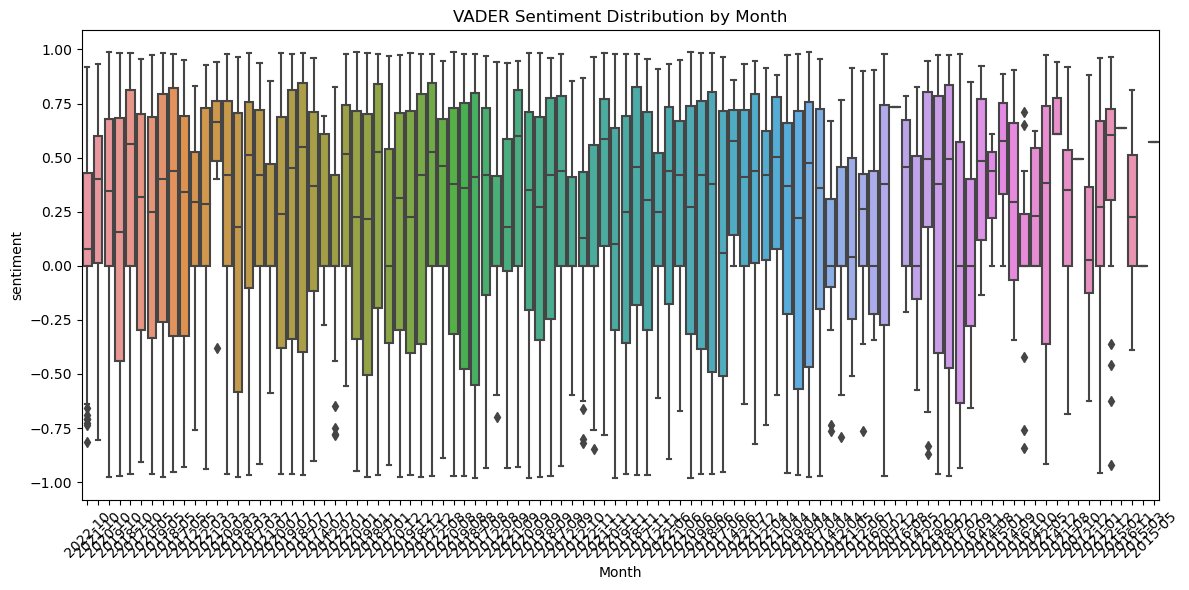

In [ ]:

# Sentiment Distribution Visualization
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='sentiment', data=df1)
plt.title("VADER Sentiment Distribution by Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


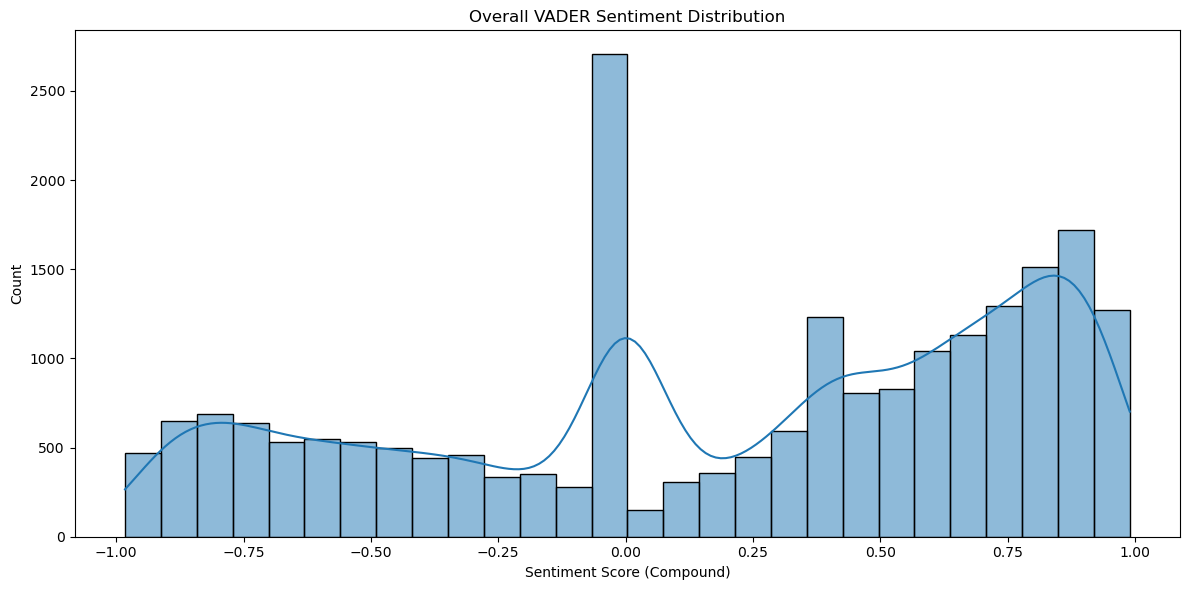

In [ ]:

# Overall Sentiment Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df1, x='sentiment', kde=True)
plt.title("Overall VADER Sentiment Distribution")
plt.xlabel("Sentiment Score (Compound)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [ ]:
# Basic statistics for sentiment
print("\nVADER Sentiment Statistics:")
print(df1['sentiment'].describe())



VADER Sentiment Statistics:
count    21822.000000
mean         0.197613
std          0.586558
min         -0.982900
25%         -0.279500
50%          0.340000
75%          0.726900
max          0.989900
Name: sentiment, dtype: float64


In [ ]:

# Monthly sentiment statistics
monthly_stats = df1.groupby('Month')['sentiment'].agg(['mean', 'std', 'count'])
print("\nMonthly VADER Sentiment Statistics:")
print(monthly_stats)



Monthly VADER Sentiment Statistics:
             mean       std  count
Month                             
2007-10  0.493900       NaN      1
2007-12  0.735100       NaN      1
2012-04  0.167951  0.335220     65
2012-05  0.225082  0.362721     51
2012-06  0.221818  0.316898     60
...           ...       ...    ...
2022-08  0.299385  0.471134     79
2022-09  0.173386  0.521052     81
2022-10  0.154647  0.432194    111
2022-11  0.174868  0.451728     96
2022-12  0.428136  0.501968     28

[100 rows x 3 columns]


In [ ]:

# Statistical comparison between months
months = df1['Month'].unique()
comparisons = []
for i in range(len(months)):
    for j in range(i+1, len(months)):
        month1 = months[i]
        month2 = months[j]
        stat, p = stats.mannwhitneyu(
            df1[df1['Month'] == month1]['sentiment'],
            df1[df1['Month'] == month2]['sentiment']
        )
        comparisons.append({
            'Month1': month1,
            'Month2': month2,
            'p_value': p
        })

comparisons_df = pd.DataFrame(comparisons)
print("\nPairwise Comparisons between Months:")
print(comparisons_df)

# Detailed Sentiment Breakdown
def get_sentiment_category(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df1['sentiment_category'] = df1['sentiment'].apply(get_sentiment_category)




Pairwise Comparisons between Months:
       Month1   Month2   p_value
0     2022-10  2021-10  0.005163
1     2022-10  2020-10  0.045086
2     2022-10  2019-10  0.959821
3     2022-10  2018-10  0.000009
4     2022-10  2017-10  0.248954
...       ...      ...       ...
4945  2015-02  2015-03  1.000000
4946  2015-02  2015-05  1.000000
4947  2016-11  2015-03  0.473457
4948  2016-11  2015-05  0.303895
4949  2015-03  2015-05  1.000000

[4950 rows x 3 columns]


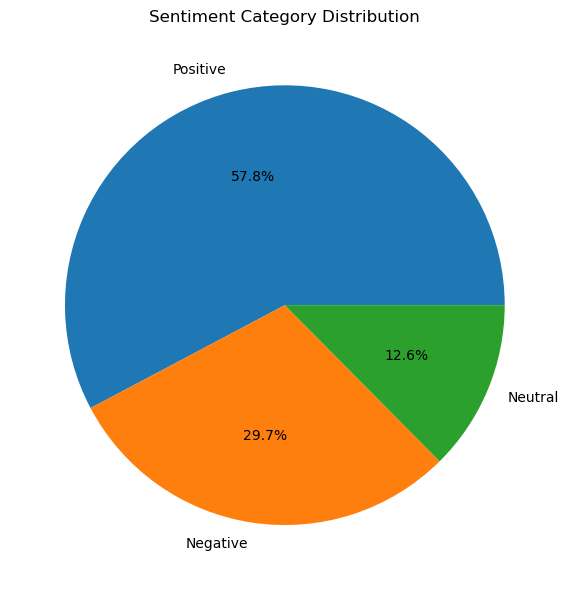

In [ ]:
# Sentiment Category Distribution
plt.figure(figsize=(10, 6))
sentiment_counts = df1['sentiment_category'].value_counts()
sentiment_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sentiment Category Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()


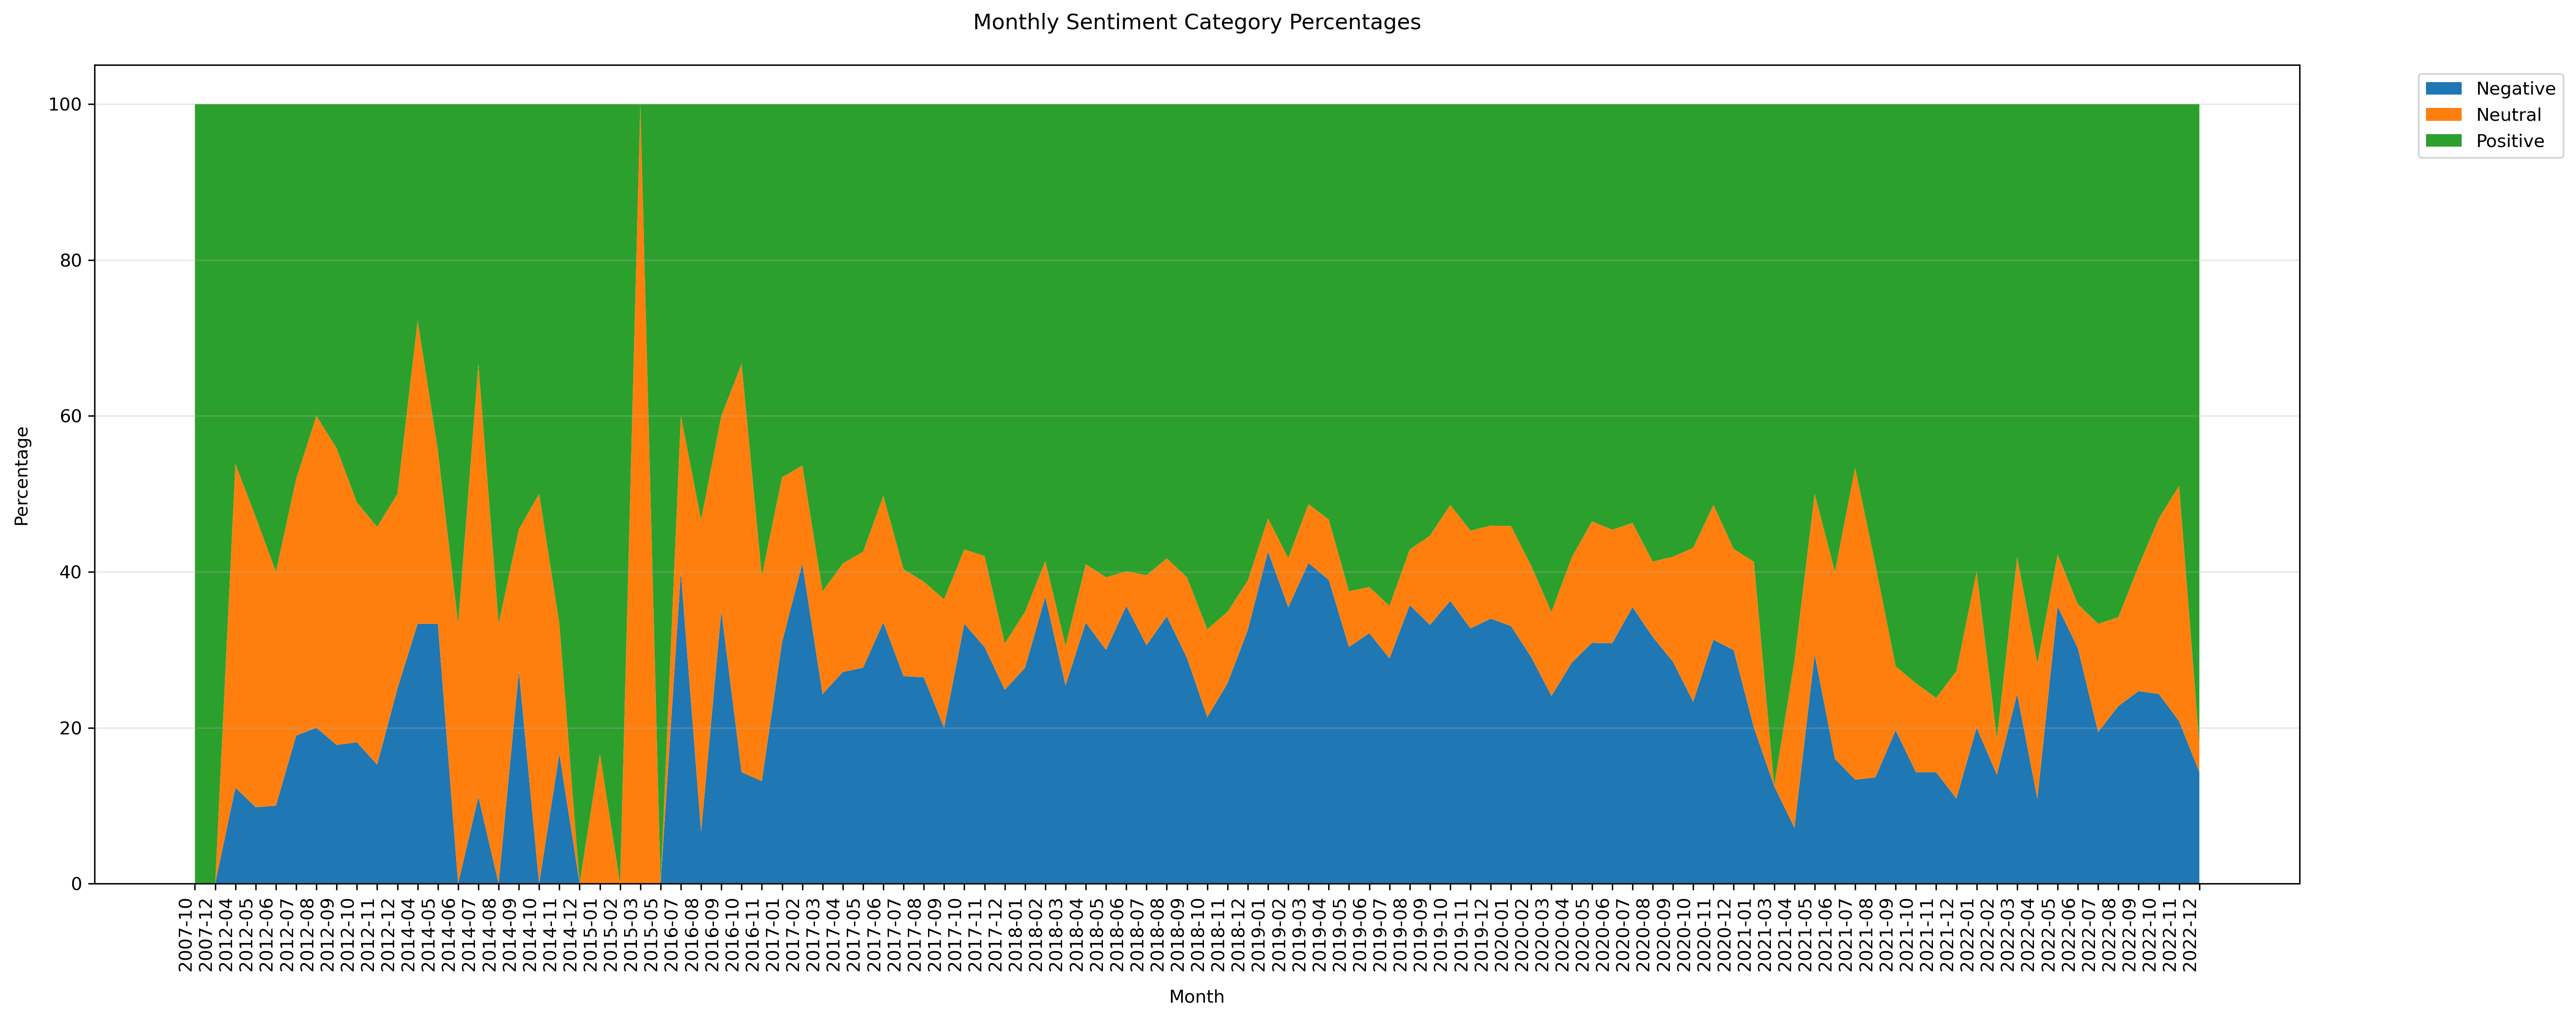

In [ ]:
# Monthly Sentiment Score
# Group by month and calculate sentiment category percentages
monthly_sentiment = df1.groupby(['Month', 'sentiment_category']).size().unstack(fill_value=0)
monthly_percentages = monthly_sentiment.div(monthly_sentiment.sum(axis=1), axis=0) * 100
# Extract values for each sentiment category
negative_values = monthly_percentages['Negative'].values
neutral_values = monthly_percentages['Neutral'].values
positive_values = monthly_percentages['Positive'].values
plt.figure(figsize=(20, 8), dpi=300)
plt.stackplot(range(len(monthly_percentages)),
             [negative_values, neutral_values, positive_values],
             labels=['Negative', 'Neutral', 'Positive'],
             colors=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.xlabel('Month', labelpad=10)
plt.ylabel('Percentage', labelpad=10)
plt.title('Monthly Sentiment Category Percentages', pad=20)
plt.xticks(range(len(monthly_percentages)),
          monthly_percentages.index.astype(str),
          rotation=90,
          ha='right')
plt.grid(True, axis='y', alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

We are interested in looking at how these relate to their approval ratings. First let's look at how approval ratings changed.

Approval Ratings Over Time



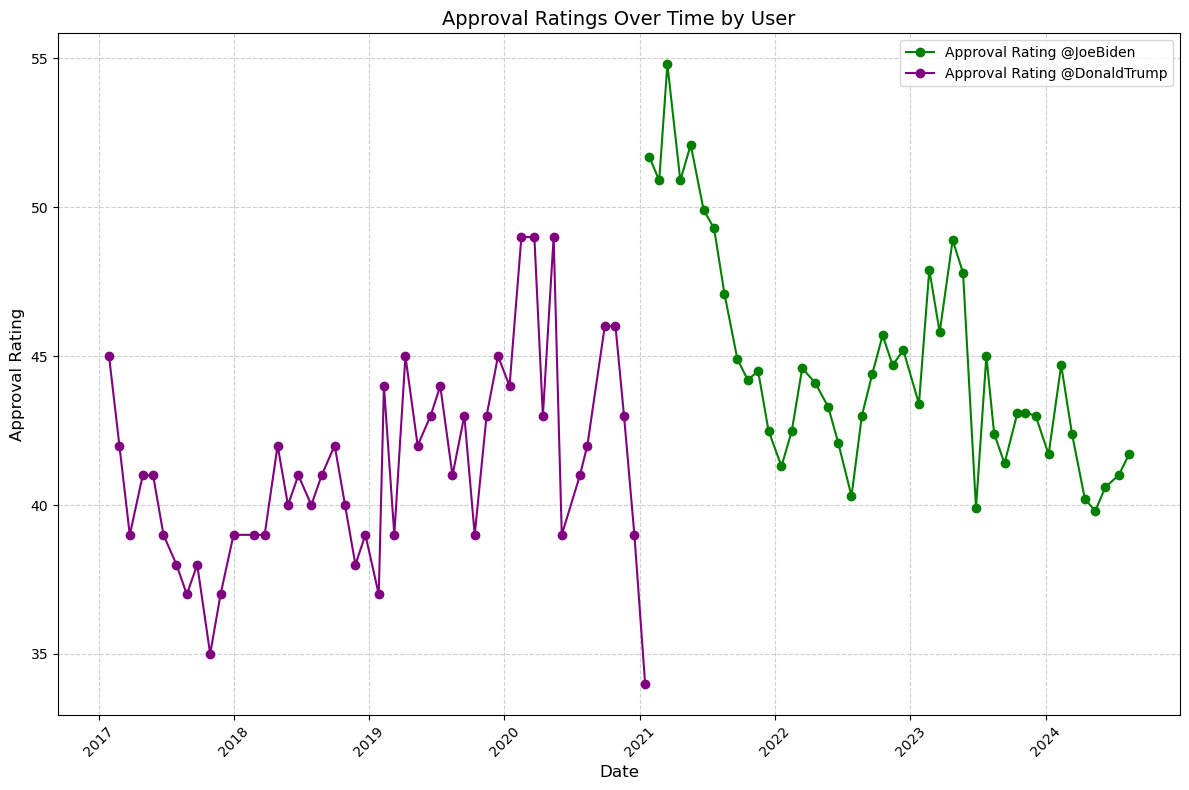

In [ ]:
# Group by User and Date to prepare for plotting
approval_grouped = merged_AR.groupby(['User', 'Date'])['Approval Rating'].mean().unstack(0)

# Plot approval ratings over time for each user
plt.figure(figsize=(12, 8))

# Plotting approval ratings for @JoeBiden and @DonaldTrump
if '@JoeBiden' in approval_grouped:
    plt.plot(
        approval_grouped.index,
        approval_grouped['@JoeBiden'],
        linestyle='-',
        marker='o',
        label='Approval Rating @JoeBiden',
        color='green'
    )
if '@DonaldTrump' in approval_grouped:
    plt.plot(
        approval_grouped.index,
        approval_grouped['@DonaldTrump'],
        linestyle='-',
        marker='o',
        label='Approval Rating @DonaldTrump',
        color='purple'
    )

# Aesthetic settings for the plot
plt.title('Approval Ratings Over Time by User', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Approval Rating', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


Key findings:

*   For approval ratings during the presidencies, Trump’s reaches its peak around the beginning of 2020 but falls shortly after, likely due to his handling of Covid.  
*   Trump's ratings reached their lowest in the beginning of 2021, corresponding with the January 5th incident.
* Biden’s approval ratings are generally above Trumps, with his peak being during the beginning of his term around early 2021, however his rating continually falls until 2022, with a relative peak around mid 2023.



Now, let's take a look at how sentiment changed.

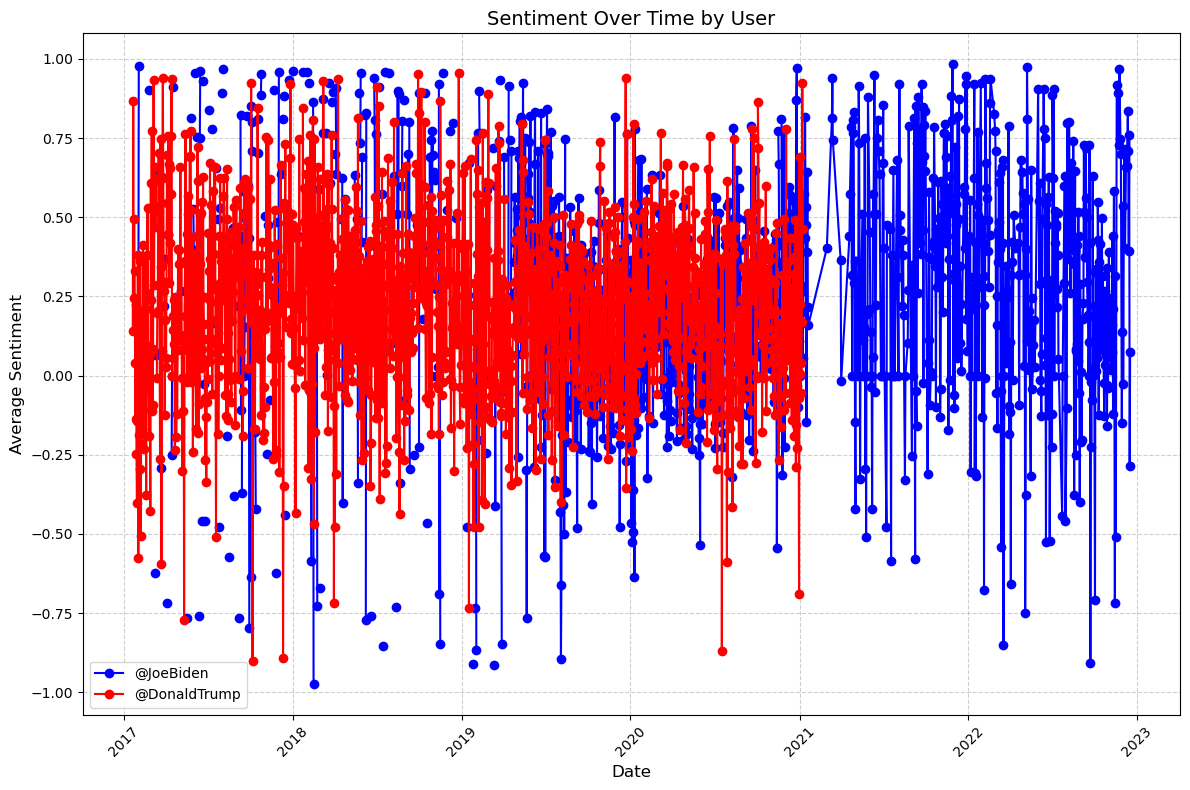

In [ ]:

# Filter data for year > 2016
df_filtered = df1[df1["Year"] > 2016]

# Group by 'ID' and 'Date', calculate mean sentiment for each group
sentiment_grouped = df_filtered.groupby(['ID', 'Date'])['sentiment'].mean().unstack(0)

# Plot sentiment over time for each ID
plt.figure(figsize=(12, 8))

# Plot lines for "@JoeBiden" and "@DonTrump" with specific colors
if "@JoeBiden" in sentiment_grouped:
    plt.plot(
        sentiment_grouped.index,
        sentiment_grouped["@JoeBiden"],
        marker='o',
        label='@JoeBiden',
        color='blue'
    )
if "@DonaldTrump" in sentiment_grouped:
    plt.plot(
        sentiment_grouped.index,
        sentiment_grouped["@DonaldTrump"],
        marker='o',
        label='@DonaldTrump',
        color='red'
    )

# Aesthetic settings for the plot
plt.title('Sentiment Over Time by User', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Sentiment', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

Key findings:
* Lots of overlap between the sentiments, making it hard to isolate a certain president for this first graph.
* Sentiments seem to follow a harsh rise and fall pattern that persists for both Presidents.  
* There seems to be a period of more neutral sentiment around 2019-2021.  


We have too many data points to visualize across different time periods.  To get a better big-picture, we created a facet grid to see how overall sentiment changed over time. We copy df1 to a new dataframe df3.


In [ ]:

df3 = df1

# Convert Period to timestamp, then extract the month
df3['Month'] = df3['Month'].dt.to_timestamp().dt.month


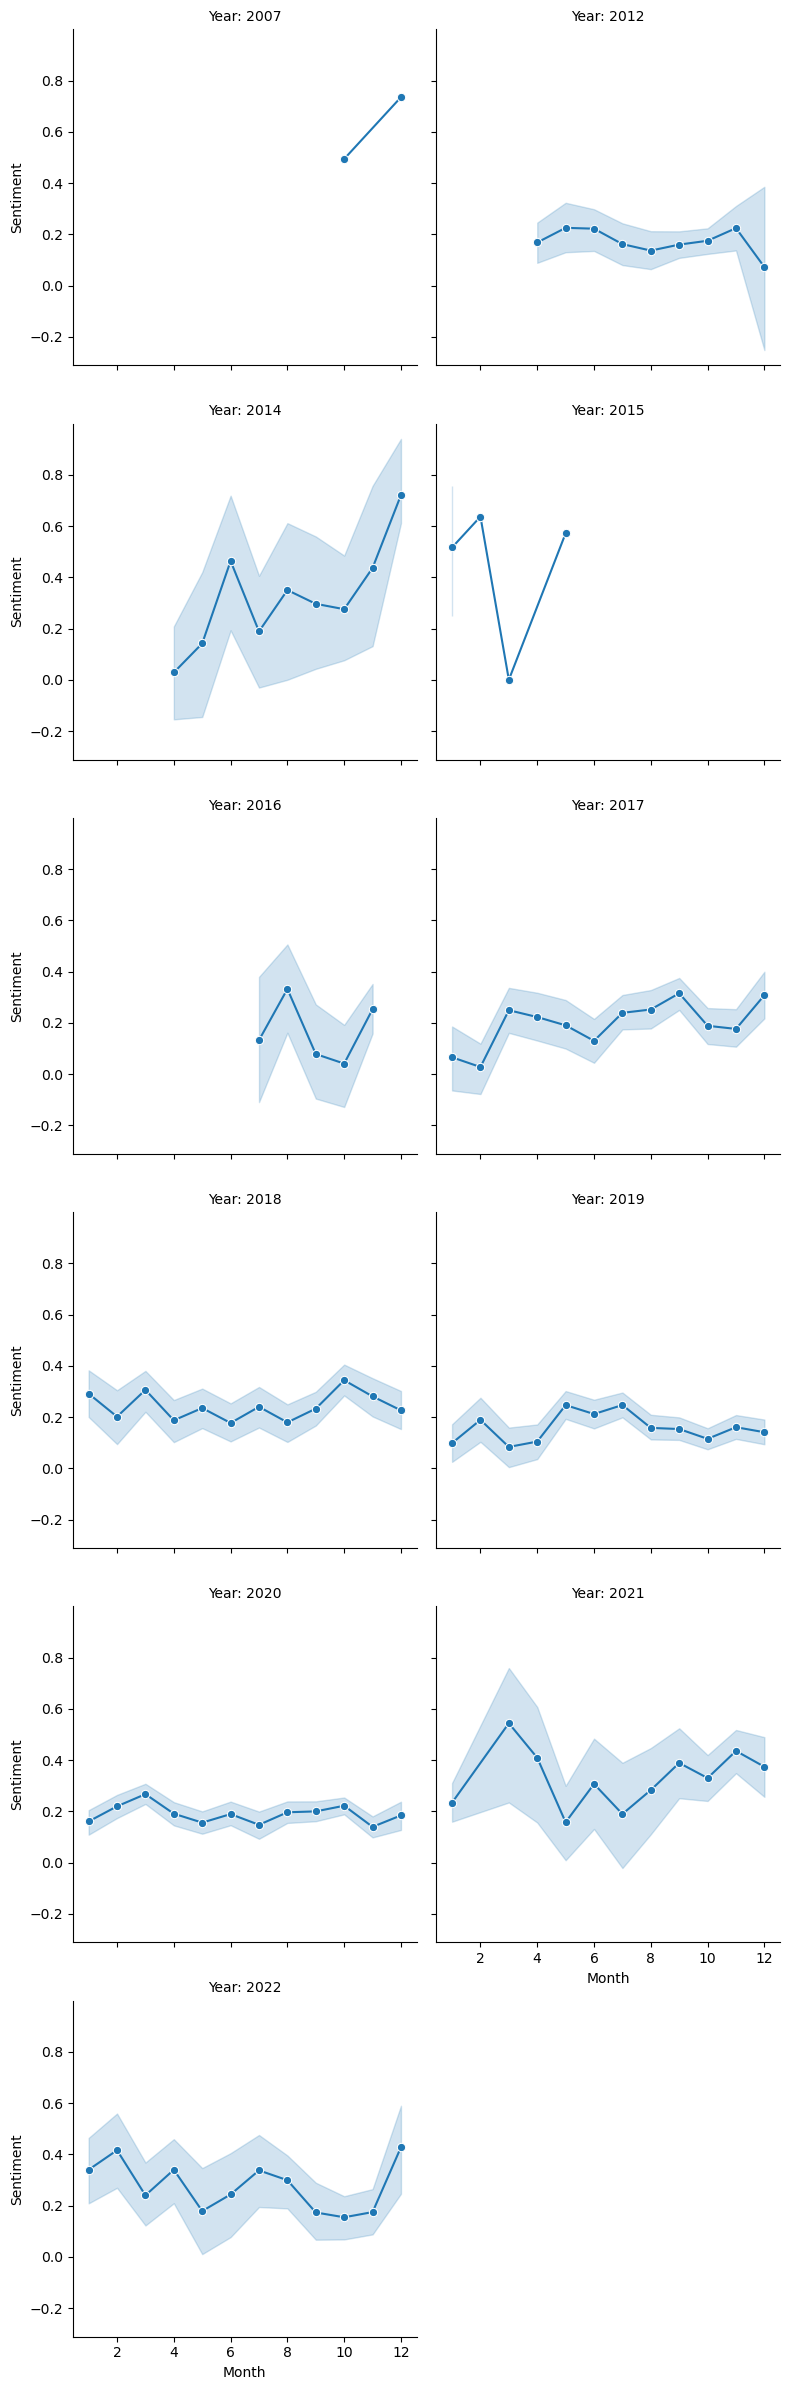

In [ ]:

# Create a faceted graph
g = sns.FacetGrid(df3, col="Year", col_wrap=2, height=4, sharey=True)
g.map(sns.lineplot, "Month", "sentiment", marker="o")

# Add titles and labels
g.set_axis_labels("Month", "Sentiment")
g.set_titles("Year: {col_name}")
g.tight_layout()

# Show the plot
plt.show()


Key findings:

* Early data belongs solely to Biden (years 2007, 2012) and is incomplete (along with 2015-2016).
* 2014 shows the steepest rise in sentiment out of all of the years, and is overall very positively sloped.
* 2017 shows a mild rise in sentiment across the months.
* 2018, 2019, and 2020 show a mostly static sentiment pattern across the months, hovering around mild values of 0.2-0.4.
* 2021 begins with a notable rise up to around 0.6, but falls down to 0.3-0.4 and stays there for the rest of the year.
* 2022 mostly hovers around 0.3-0.4 sentiment values but has a rise after a relative low at the end of the year.  


We standardized the data by comparing “Months after inauguration.” where January in both of their inaugural years is 0. We then plotted Monthly Average Sentiment by Users

In [ ]:


# Filter for Joe Biden's tweets
biden_tweets = df3[df3['ID'] == '@JoeBiden'].copy()

# Define inauguration date for Joe Biden
inauguration_date = pd.Timestamp('2021-01-20')

# Calculate presidency month
biden_tweets['Presidency_Month'] = (
    (biden_tweets['Date'].dt.year - inauguration_date.year) * 12 +
    (biden_tweets['Date'].dt.month - inauguration_date.month)
)

# Adjust for months before presidency to be negative
biden_tweets.loc[biden_tweets['Date'] < inauguration_date, 'Presidency_Month'] -= 1

# Group by Presidency_Month to calculate average sentiment
monthly_sentiment_biden = biden_tweets.groupby('Presidency_Month')['sentiment'].mean().reset_index()

# Filter for Presidency_Month >= 0
biden_presidency_sentiment = monthly_sentiment_biden[monthly_sentiment_biden['Presidency_Month'] >= 0]

# Filter for Donald Trump's tweets
trump_tweets = df3[df3['ID'] == '@DonaldTrump'].copy()

# Define inauguration date for Donald Trump
inauguration_date_trump = pd.Timestamp('2017-01-20')

# Calculate presidency month for Donald Trump
trump_tweets['Presidency_Month'] = (
    (trump_tweets['Date'].dt.year - inauguration_date_trump.year) * 12 +
    (trump_tweets['Date'].dt.month - inauguration_date_trump.month)
)

# Adjust for months before presidency to be negative
trump_tweets.loc[trump_tweets['Date'] < inauguration_date_trump, 'Presidency_Month'] -= 1

# Group by Presidency_Month to calculate average sentiment
monthly_sentiment_trump = trump_tweets.groupby('Presidency_Month')['sentiment'].mean().reset_index()
# Filter for Presidency_Month <= 23 for Donald Trump's tweets
trump_presidency_sentiment = monthly_sentiment_trump[monthly_sentiment_trump['Presidency_Month'] <= 23]


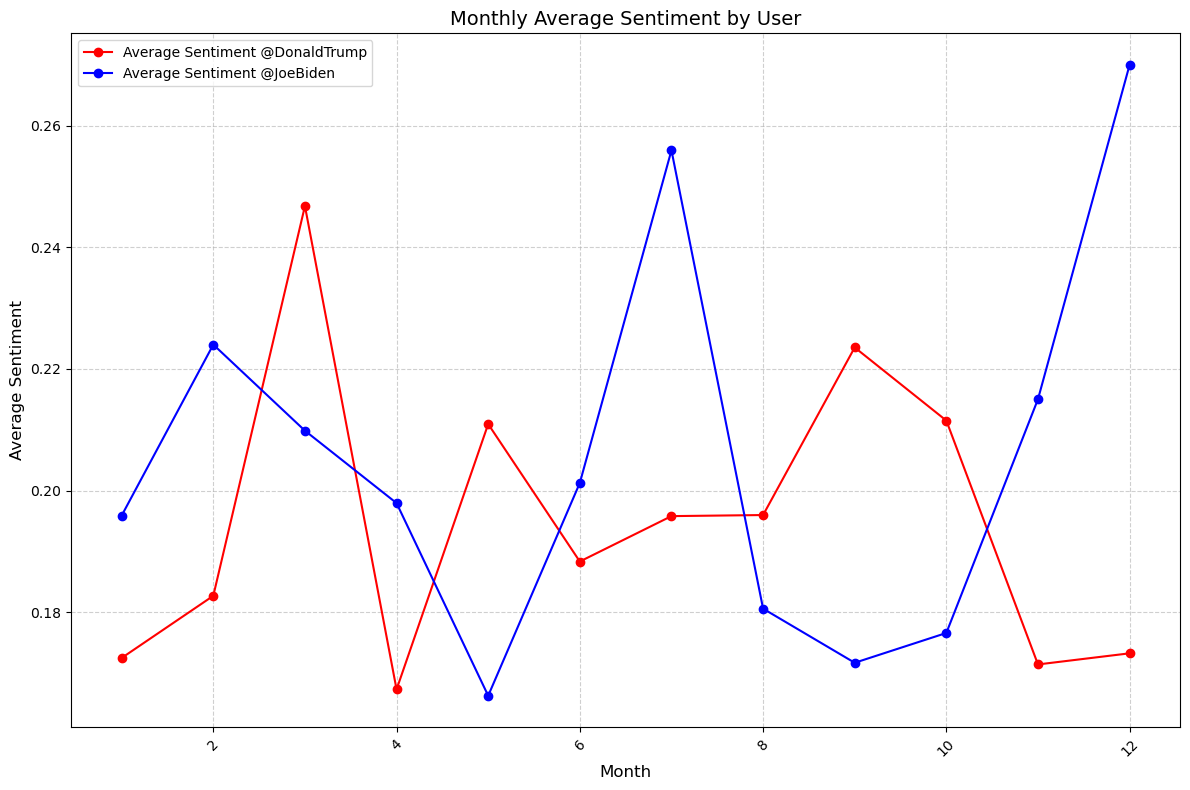

In [ ]:
# Calculating average sentiment grouped by month for Trump and Biden
trump_month = df1[df1["ID"] == "@DonaldTrump"]['sentiment'].groupby(df['Month']).mean()
biden_month = df1[df1["ID"] == "@JoeBiden"]['sentiment'].groupby(df['Month']).mean()

# Plotting the monthly sentiment averages
plt.figure(figsize=(12, 8))

# Trump monthly sentiment
plt.plot(
    trump_month.index,
    trump_month.values,
    marker='o',
    linestyle='-',
    label='Average Sentiment @DonaldTrump',
    color='red'
)

# Biden monthly sentiment
plt.plot(
    biden_month.index,
    biden_month.values,
    marker='o',
    linestyle='-',
    label='Average Sentiment @JoeBiden',
    color='blue'
)

# Aesthetic settings for the plot
plt.title('Monthly Average Sentiment by User', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Sentiment', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


* This new graph is much easier to read and interpret, with the categorization much more easily differentiable and identifiable.
* For Biden, he has a relative peak midway through, and then reaches his high absolute peak at the very end after a consistent rise in sentiment (around 0.28-0.3)
* For Trump, he has his absolute peak in sentiment early on (0.24-0.25), but quickly falls, with two relative peaks of 0.21 (early/mid way) and 0.22-0.23 (toward the end of the year)


We were curious how the approval rating changed with the sentient changes.

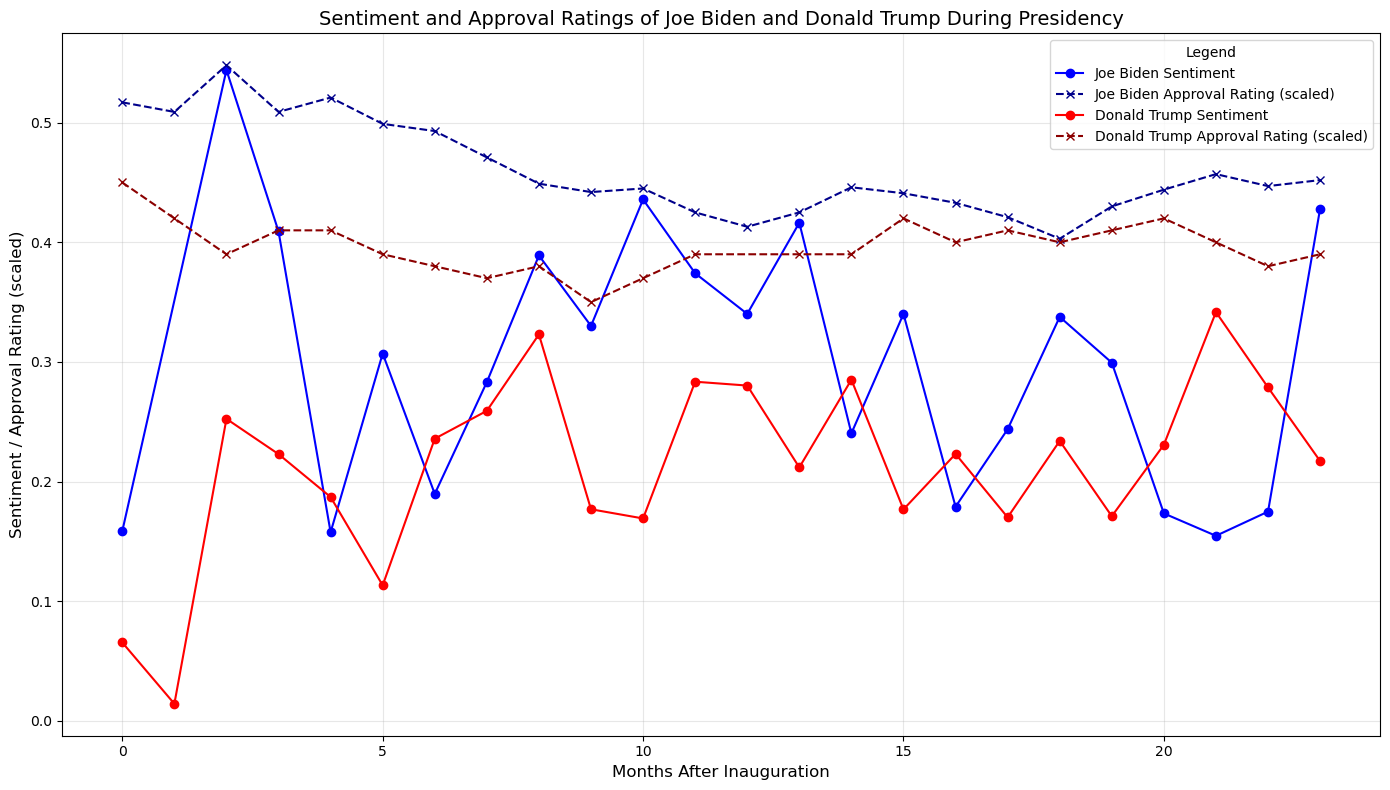

In [ ]:

# Ensure the 'Date' column is in datetime format
Trump_AR['Date'] = pd.to_datetime(Trump_AR['Date'])

# Define inauguration date for Donald Trump
inauguration_date_trump = pd.Timestamp('2017-01-20')

# Calculate months after inauguration
Trump_AR['Months_After_Inauguration'] = (
    (Trump_AR['Date'].dt.year - inauguration_date_trump.year) * 12 +
    (Trump_AR['Date'].dt.month - inauguration_date_trump.month)
)

# Ensure the 'Date' column is in datetime format
Biden_AR['Date'] = pd.to_datetime(Biden_AR['Date'])

# Define inauguration date for Donald Trump
inauguration_date_trump = pd.Timestamp('2021-01-20')

# Calculate months after inauguration
Biden_AR['Months_After_Inauguration'] = (
    (Biden_AR['Date'].dt.year - inauguration_date_trump.year) * 12 +
    (Biden_AR['Date'].dt.month - inauguration_date_trump.month)
)
Trump_AR_23 = Trump_AR[Trump_AR['Months_After_Inauguration'] <= 23]
Biden_AR_23 = Biden_AR[Biden_AR['Months_After_Inauguration'] <= 23]


# Plotting the sentiment trends and approval ratings for Joe Biden and Donald Trump
plt.figure(figsize=(14, 8))

# Plot Joe Biden's sentiment
plt.plot(
    biden_presidency_sentiment['Presidency_Month'],
    biden_presidency_sentiment['sentiment'],
    label="Joe Biden Sentiment",
    color='blue',
    marker='o',
    linestyle='-'
)

# Plot Joe Biden's approval ratings
plt.plot(
    Biden_AR_23['Months_After_Inauguration'],
    Biden_AR_23['Approval Rating'] / 100,  # Scale approval ratings to match sentiment range
    label="Joe Biden Approval Rating (scaled)",
    color='darkblue',
    marker='x',
    linestyle='--'
)

# Plot Donald Trump's sentiment
plt.plot(
    trump_presidency_sentiment['Presidency_Month'],
    trump_presidency_sentiment['sentiment'],
    label="Donald Trump Sentiment",
    color='red',
    marker='o',
    linestyle='-'
)

# Plot Donald Trump's approval ratings
plt.plot(
    Trump_AR_23['Months_After_Inauguration'],
    Trump_AR_23['Approval Rating'] / 100,  # Scale approval ratings to match sentiment range
    label="Donald Trump Approval Rating (scaled)",
    color='darkred',
    marker='x',
    linestyle='--'
)

# Add labels, legend, and title
plt.xlabel("Months After Inauguration", fontsize=12)
plt.ylabel("Sentiment / Approval Rating (scaled)", fontsize=12)
plt.title("Sentiment and Approval Ratings of Joe Biden and Donald Trump During Presidency", fontsize=14)
plt.legend(title="Legend", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

Key Findings:

* Joe Biden’s peak approval rating coincides with his highest sentiment metric, however, besides the very end of his term, where the metric line up once more, they seem to take on separate patterns.  However, the approval rating decreases after the peak, similar to the approval rating after the peak.
* For Trump, the metrics seem to follow different patterns, with little overlap.


We calculated the marginal changes between approval rating and sentiment and plotted it for relative comparison.


In [ ]:
# Calculate month-to-month changes in sentiment for Joe Biden
biden_presidency_sentiment['Sentiment_Change'] = biden_presidency_sentiment['sentiment'].diff()

# Calculate month-to-month changes in approval ratings for Joe Biden
Biden_AR_23['Approval_Rating_Change'] = Biden_AR_23['Approval Rating'].diff()

# Calculate month-to-month changes in sentiment for Donald Trump
trump_presidency_sentiment['Sentiment_Change'] = trump_presidency_sentiment['sentiment'].diff()

# Calculate month-to-month changes in approval ratings for Donald Trump
Trump_AR_23['Approval_Rating_Change'] = Trump_AR_23['Approval Rating'].diff()
# Storing the plot in a variable



In [ ]:

def create_presidency_sentiment_plot():
    plt.figure(figsize=(14, 8))

    # Plot changes in Joe Biden's sentiment
    plt.plot(
        biden_presidency_sentiment['Presidency_Month'],
        biden_presidency_sentiment['Sentiment_Change'],
        label="Joe Biden Sentiment Change",
        color='blue',
        marker='o',
        linestyle='-'
    )

    # Plot changes in Joe Biden's approval ratings
    plt.plot(
        Biden_AR_23['Months_After_Inauguration'],
        Biden_AR_23['Approval_Rating_Change'] / 100,  # Scale to match sentiment change range
        label="Joe Biden Approval Rating Change (scaled)",
        color='darkblue',
        marker='x',
        linestyle='--'
    )

    # Plot changes in Donald Trump's sentiment
    plt.plot(
        trump_presidency_sentiment['Presidency_Month'],
        trump_presidency_sentiment['Sentiment_Change'],
        label="Donald Trump Sentiment Change",
        color='red',
        marker='o',
        linestyle='-'
    )

    # Plot changes in Donald Trump's approval ratings
    plt.plot(
        Trump_AR_23['Months_After_Inauguration'],
        Trump_AR_23['Approval_Rating_Change'] / 100,  # Scale to match sentiment change range
        label="Donald Trump Approval Rating Change (scaled)",
        color='darkred',
        marker='x',
        linestyle='--'
    )

    # Add labels, legend, and title
    plt.xlabel("Months After Inauguration", fontsize=12)
    plt.ylabel("Change in Sentiment / Approval Rating (scaled)", fontsize=12)
    plt.title("Month-to-Month Changes in Sentiment and Approval Ratings During Presidency", fontsize=14)
    plt.legend(title="Legend", fontsize=10)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    return plt

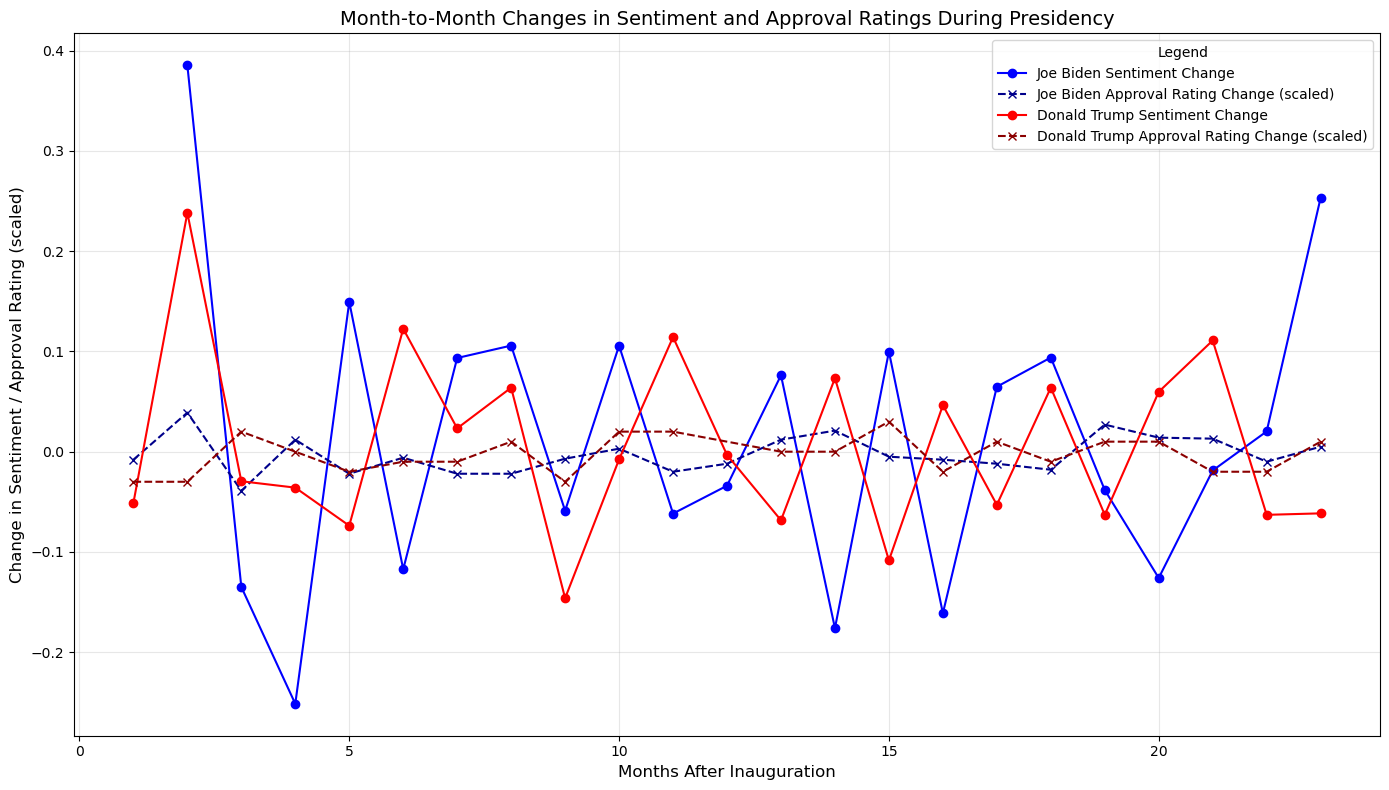

In [ ]:
# Assigning the plot to a variable
presidency_sentiment_plot = create_presidency_sentiment_plot()
presidency_sentiment_plot.show()



#### **Peaks and Dips**:
- **Trump**:
  - Sentiment peaks and dips are smaller in magnitude, clustering around the mean.
  - **Largest Peak (Month 2)**: Optimism during the honeymoon phase (+0.238).
  - **Sharpest Dip (Month 9)**: Controversies like Charlottesville and healthcare reform failures (-0.146).
- **Biden**:
  - Sentiment peaks and dips are more extreme, reflecting stronger public reactions to events.
  - **Largest Peak (Month 2)**: Optimism driven by vaccine rollouts and rejoining international agreements (+0.385).
  - **Sharpest Dip (Month 4)**: Crises like the Afghanistan withdrawal and Delta variant resurgence (-0.251).



 **Approval Trends**
- **Trump**:
  - Moderate fluctuations in approval ratings, insulated by a loyal core base. Approval ratings are less influenced by sentiment shifts.
- **Biden**:
  - Higher fluctuations in approval ratings, reflecting a more diverse and reactive coalition. Approval ratings align more closely with sentiment changes.

There does not seem to be a consistent or notable pattern between the two metrics month to month. We ran some summary statistics and correlations.

In [ ]:
# Calculating summary statistics for Trump's presidency sentiment changes
summary_statistics_T = trump_presidency_sentiment["Sentiment_Change"].dropna().describe()

# Adding variance manually since it's not included in `describe`
summary_statistics_T['variance'] =trump_presidency_sentiment["Sentiment_Change"].dropna().var()

# Calculating summary statistics for Biden's presidency sentiment changes
summary_statistics_B = biden_presidency_sentiment["Sentiment_Change"].dropna().describe()

# Adding variance manually since it's not included in `describe`
summary_statistics_B['variance'] = biden_presidency_sentiment["Sentiment_Change"].dropna().var()


In [ ]:
summary_statistics_T

count       23.000000
mean         0.006595
std          0.090088
min         -0.146140
25%         -0.062226
50%         -0.007683
75%          0.063869
max          0.238197
variance     0.008116
Name: Sentiment_Change, dtype: float64

In [ ]:
summary_statistics_B

count       22.000000
mean         0.012252
std          0.149659
min         -0.251474
25%         -0.103427
50%          0.000741
75%          0.098352
max          0.385450
variance     0.022398
Name: Sentiment_Change, dtype: float64

### **Sentiment Trends**
#### **Variability**:
- **Trump**:
  - Sentiment changes are less volatile, with low variance (**0.0081**). Public emotions remain steady, reflecting entrenched opinions among supporters and critics.
- **Biden**:
  - Sentiment changes are more dynamic, with higher variance (**0.0224**). Larger spikes and dips reflect a broader, more reactive coalition.

In [ ]:
trump_presidency_sentiment

,Presidency_Month,sentiment,Sentiment_Change
0,0,0.065473,NaN
1,1,0.014223,-0.051250
2,2,0.252420,0.238197
3,3,0.222932,-0.029488
4,4,0.187070,-0.035863
5,5,0.113240,-0.073830
6,6,0.235838,0.122598
7,7,0.259127,0.023289
8,8,0.322979,0.063852
9,9,0.176839,-0.146140


In [ ]:
biden_presidency_sentiment

,Presidency_Month,sentiment,Sentiment_Change
77,0,0.158600,NaN
78,2,0.544050,0.385450
79,3,0.409100,-0.134950
80,4,0.157626,-0.251474
81,5,0.307024,0.149398
82,6,0.189700,-0.117324
83,7,0.283159,0.093459
84,8,0.388990,0.105831
85,9,0.330100,-0.058890
86,10,0.435831,0.105731



### **Temporal Patterns**
#### **Early Presidency**:
- **Trump**:
  - Optimism during the honeymoon phase, with a sentiment peak in Month 2 (+0.238), driven by decisive early actions.
- **Biden**:
  - Stronger optimism during the honeymoon phase, with a sentiment peak in Month 2 (+0.385), driven by vaccine rollouts and policy reversals.




#### **Mid-Presidency**:
- **Trump**:
  - Stable sentiment and approval despite controversies like Charlottesville (Month 9) and healthcare reform challenges.
- **Biden**:
  - Sharp sentiment and approval declines during crises like the Afghanistan withdrawal (Month 4) and inflation concerns (Month 14).



#### **Later Presidency**:
- **Trump**:
  - Stable sentiment and approval ratings, reflecting entrenched public opinions.
- **Biden**:
  - Sentiment and approval recover, with a strong rebound in Month 23 (+0.253) tied to legislative wins and economic stabilization.

In [ ]:
# Merging Trump and Biden sentiment with approval ratings based on provided DataFrames

# Merging Trump's sentiment and approval data
trump_combined = pd.merge(
    trump_presidency_sentiment[["Presidency_Month", "Sentiment_Change"]],
    Trump_AR_23[["Months_After_Inauguration", "Approval_Rating_Change"]],
    left_on="Presidency_Month",
    right_on="Months_After_Inauguration",
    how="inner"
).dropna()

# Assuming `biden_presidency_sentiment` and `Biden_AR_23` are already defined
# Merging Biden's sentiment and approval data
biden_combined = pd.merge(
    biden_presidency_sentiment[["Presidency_Month", "Sentiment_Change"]],
    Biden_AR_23[["Months_After_Inauguration", "Approval_Rating_Change"]],
    left_on="Presidency_Month",
    right_on="Months_After_Inauguration",
    how="inner"
).dropna()

# Calculate correlations
trump_correlation = trump_combined["Sentiment_Change"].corr(trump_combined["Approval_Rating_Change"])
biden_correlation = biden_combined["Sentiment_Change"].corr(biden_combined["Approval_Rating_Change"])


In [ ]:
# Calculating correlations and p-values
from scipy.stats import pearsonr

if not trump_combined.empty:
    trump_corr, trump_p_value = pearsonr(
        trump_combined["Sentiment_Change"],
        trump_combined["Approval_Rating_Change"]
    )
else:
    trump_corr, trump_p_value = None, None

if not biden_combined.empty:
    biden_corr, biden_p_value = pearsonr(
        biden_combined["Sentiment_Change"],
        biden_combined["Approval_Rating_Change"]
    )
else:
    biden_corr, biden_p_value = None, None

In [ ]:
{
    "Trump Sentiment-Approval Correlation": trump_corr,
    "Trump p-value": trump_p_value,
    "Biden Sentiment-Approval Correlation": biden_corr,
    "Biden p-value": biden_p_value
}

{'Trump Sentiment-Approval Correlation': -0.15682734510161056,
 'Trump p-value': 0.48581560454277495,
 'Biden Sentiment-Approval Correlation': 0.11700805470028611,
 'Biden p-value': 0.6040620099261004}


### **Correlation Between Sentiment and Approval Ratings**
- **Trump**:
  - Correlation: Weak negative (-0.157).
  - Sentiment changes have a minor inverse relationship with approval ratings. Positive sentiment may alienate moderates, while controversies energize his core base.
- **Biden**:
  - Correlation: Weak positive (+0.117).
  - Sentiment changes have a minor direct relationship with approval ratings. Public approval aligns more closely with positive sentiment shifts.

 **Public Perception Dynamics**
- **Trump**:
  - Polarized public perception, with a stable core base less affected by sentiment changes. Controversies often strengthen approval among supporters.
- **Biden**:
  - Broad coalition of support makes approval ratings more sensitive to sentiment changes. Crises often lead to sharp declines in both sentiment and approval.





 **Communication Style**
- **Trump**:
  - Polarizing and direct messaging, often through Twitter, bypasses traditional media. Energizes his base but alienates critics, leading to weak alignment between sentiment and approval.
- **Biden**:
  - Traditional and less polarizing communication style resonates more broadly. Sentiment and approval are better aligned but may lack the energy to rally his base during crises.




## **Key Differences**

| **Aspect**             | **Donald Trump**                                | **Joe Biden**                               |
|-------------------------|------------------------------------------------|--------------------------------------------|
| **Correlation**         | Weak negative (-0.157)                        | Weak positive (+0.117)                     |
| **Sentiment Variability** | Low variance (stable)                        | High variance (dynamic)                    |
| **Approval Trends**     | Moderate fluctuations, weak alignment with sentiment | Higher fluctuations, modest alignment with sentiment |
| **Public Perception**   | Polarized, stable core base                   | Diverse, reactive coalition                |
| **Communication Style** | Polarizing and direct, base-oriented          | Traditional and measured, coalition-oriented |
| **Response to Crises**  | Limited sentiment impact, resilient approval  | Sharp sentiment and approval declines      |
| **Early Presidency**    | Optimism from decisive actions (+0.238)       | Optimism from policy promises (+0.385)    |
| **Mid-Presidency**      | Stable despite controversies                  | Declines during crises                     |
| **Later Presidency**    | Stable sentiment and approval                 | Recovery in sentiment and approval         |




## **Conclusion**
- **Trump**:
  - Sentiment is less volatile and less aligned with approval ratings. His presidency is defined by polarization and a loyal core base that insulates approval from sentiment shifts.
- **Biden**:
  - Sentiment is more dynamic and aligns modestly with approval ratings. His presidency reflects a broader coalition where public perception is more reactive to successes and crises.
  